In [1]:
import sys
# I don't know how to do this in general ...
sys.path.append('C:\\Users\\Clint\\neural-networks-project-algorithmic-oracle')

In [2]:
from utils.data import *

data = get_sp500_df()
print(data)

{'companies':     Exchange Symbol                  Shortname  \
0        NMS   MSFT      Microsoft Corporation   
1        NMS   AAPL                 Apple Inc.   
2        NMS   NVDA         NVIDIA Corporation   
3        NMS   AMZN           Amazon.com, Inc.   
4        NMS  GOOGL              Alphabet Inc.   
..       ...    ...                        ...   
497      NYQ    FMC            FMC Corporation   
498      NYQ    CMA      Comerica Incorporated   
499      NYQ    VFC           V.F. Corporation   
500      NYQ    WHR      Whirlpool Corporation   
501      NMS   ZION  Zions Bancorporation N.A.   

                                       Longname                  Sector  \
0                         Microsoft Corporation              Technology   
1                                    Apple Inc.              Technology   
2                            NVIDIA Corporation              Technology   
3                              Amazon.com, Inc.       Consumer Cyclical   
4         

In [3]:
stocks_df = data['stocks']
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# key parsing pivot step
pivot_stocks_df = stocks_df.pivot(index='Date', columns='Symbol', values='Close')

pivot_stocks_df

Symbol               A    AAL        AAPL        ABBV        ABNB         ABT  \
Date                                                                            
2010-01-04   22.389128   4.77    7.643214         NaN         NaN   26.129908   
2010-01-05   22.145924   5.31    7.656429         NaN         NaN   25.918797   
2010-01-06   22.067240   5.09    7.534643         NaN         NaN   26.062737   
2010-01-07   22.038628   5.24    7.520714         NaN         NaN   26.278646   
2010-01-08   22.031473   5.14    7.570714         NaN         NaN   26.412991   
...                ...    ...         ...         ...         ...         ...   
2024-02-16  134.839996  14.64  182.309998  177.490005  152.509995  114.010002   
2024-02-20  134.139999  14.70  181.559998  175.750000  148.149994  116.639999   
2024-02-21  135.330002  14.79  182.320007  175.139999  149.240005  117.870003   
2024-02-22  132.020004  15.24  184.369995  176.750000  155.259995  119.019997   
2024-02-23  132.029999  15.13  182.520004  178.089996  152.660004  119.459999   

Symbol           ACGL         ACN        ADBE         ADI  ...        WYNN  \
Date                                                       ...               
2010-01-04   7.994444   42.070000   37.090000   31.670000  ...   63.959999   
2010-01-05   7.967778   42.330002   37.700001   31.620001  ...   67.849998   
2010-01-06   7.933333   42.779999   37.619999   31.559999  ...   66.959999   
2010-01-07   7.886667   42.740002   36.889999   31.309999  ...   68.389999   
2010-01-08   7.871111   42.570000   36.689999   31.490000  ...   67.900002   
...               ...         ...         ...         ...  ...         ...   
2024-02-16  86.110001  369.480011  546.659973  188.240005  ...  105.129997   
2024-02-20  85.370003  362.950012  541.909973  189.399994  ...  103.230003   
2024-02-21  84.709999  360.910004  538.520020  193.720001  ...  102.379997   
2024-02-22  85.820000  371.309998  537.570007  191.910004  ...  102.419998   
2024-02-23  87.290001  377.320007  553.440002  190.110001  ...  104.160004   

Symbol            XEL         XOM       XRAY         XYL         YUM  \
Date                                                                   
2010-01-04  21.080000   69.150002  35.330002         NaN   25.226456   
2010-01-05  20.830000   69.419998  34.910000         NaN   25.140186   
2010-01-06  20.870001   70.019997  35.139999         NaN   24.960461   
2010-01-07  20.780001   69.800003  35.599998         NaN   24.953272   
2010-01-08  20.790001   69.519997  35.599998         NaN   24.960461   
...               ...         ...        ...         ...         ...   
2024-02-16  59.070000  103.730003  33.580002  123.790001  134.550003   
2024-02-20  59.189999  102.750000  33.750000  124.099998  133.949997   
2024-02-21  59.810001  104.849998  33.080002  123.489998  135.229996   
2024-02-22  59.330002  104.760002  33.570000  125.099998  137.330002   
2024-02-23  59.330002  103.839996  33.910000  125.629997  138.320007   

Symbol             ZBH        ZBRA       ZION         ZTS  
Date                                                       
2010-01-04   58.271847   28.670000  13.330000         NaN  
2010-01-05   60.116505   28.620001  13.800000         NaN  
2010-01-06   60.097088   28.400000  15.000000         NaN  
2010-01-07   61.475727   27.690001  16.680000         NaN  
2010-01-08   60.184467   27.600000  16.410000         NaN  
...                ...         ...        ...         ...  
2024-02-16  124.709999  275.459991  40.639999  188.389999  
2024-02-20  124.980003  271.929993  40.090000  186.550003  
2024-02-21  128.350006  274.429993  39.599998  188.380005  
2024-02-22  128.539993  279.480011  39.650002  196.660004  
2024-02-23  129.179993  274.989990  39.029999  197.210007  

[3559 rows x 503 columns]

In [4]:
daily_returns = pivot_stocks_df.pct_change().dropna()
cov_matrix = daily_returns.cov()

daily_returns.head(), cov_matrix.head()

(Symbol             A       AAL      AAPL      ABBV      ABNB       ABT  \
 Date                                                                     
 2023-10-05 -0.011821  0.009427  0.007198 -0.001625 -0.018994  0.005750   
 2023-10-06  0.002628 -0.007004  0.014750  0.005358  0.010961  0.007069   
 2023-10-09  0.005785 -0.040752  0.008451  0.005869  0.011159 -0.001239   
 2023-10-10  0.018063  0.001634 -0.003352 -0.001475  0.029897  0.008268   
 2023-10-11  0.000794  0.017944  0.007904  0.003022 -0.012083 -0.050430   
 
 Symbol          ACGL       ACN      ADBE       ADI  ...      WYNN       XEL  \
 Date                                                ...                       
 2023-10-05  0.014666  0.000873 -0.003819 -0.009724  ...  0.014511 -0.002649   
 2023-10-06  0.006614  0.008170  0.019828  0.010866  ...  0.032629  0.015404   
 2023-10-09 -0.001339 -0.000577  0.004956 -0.003736  ...  0.007142  0.005231   
 2023-10-10 -0.002559  0.000994  0.006480  0.015290  ...  0.009885  0.007

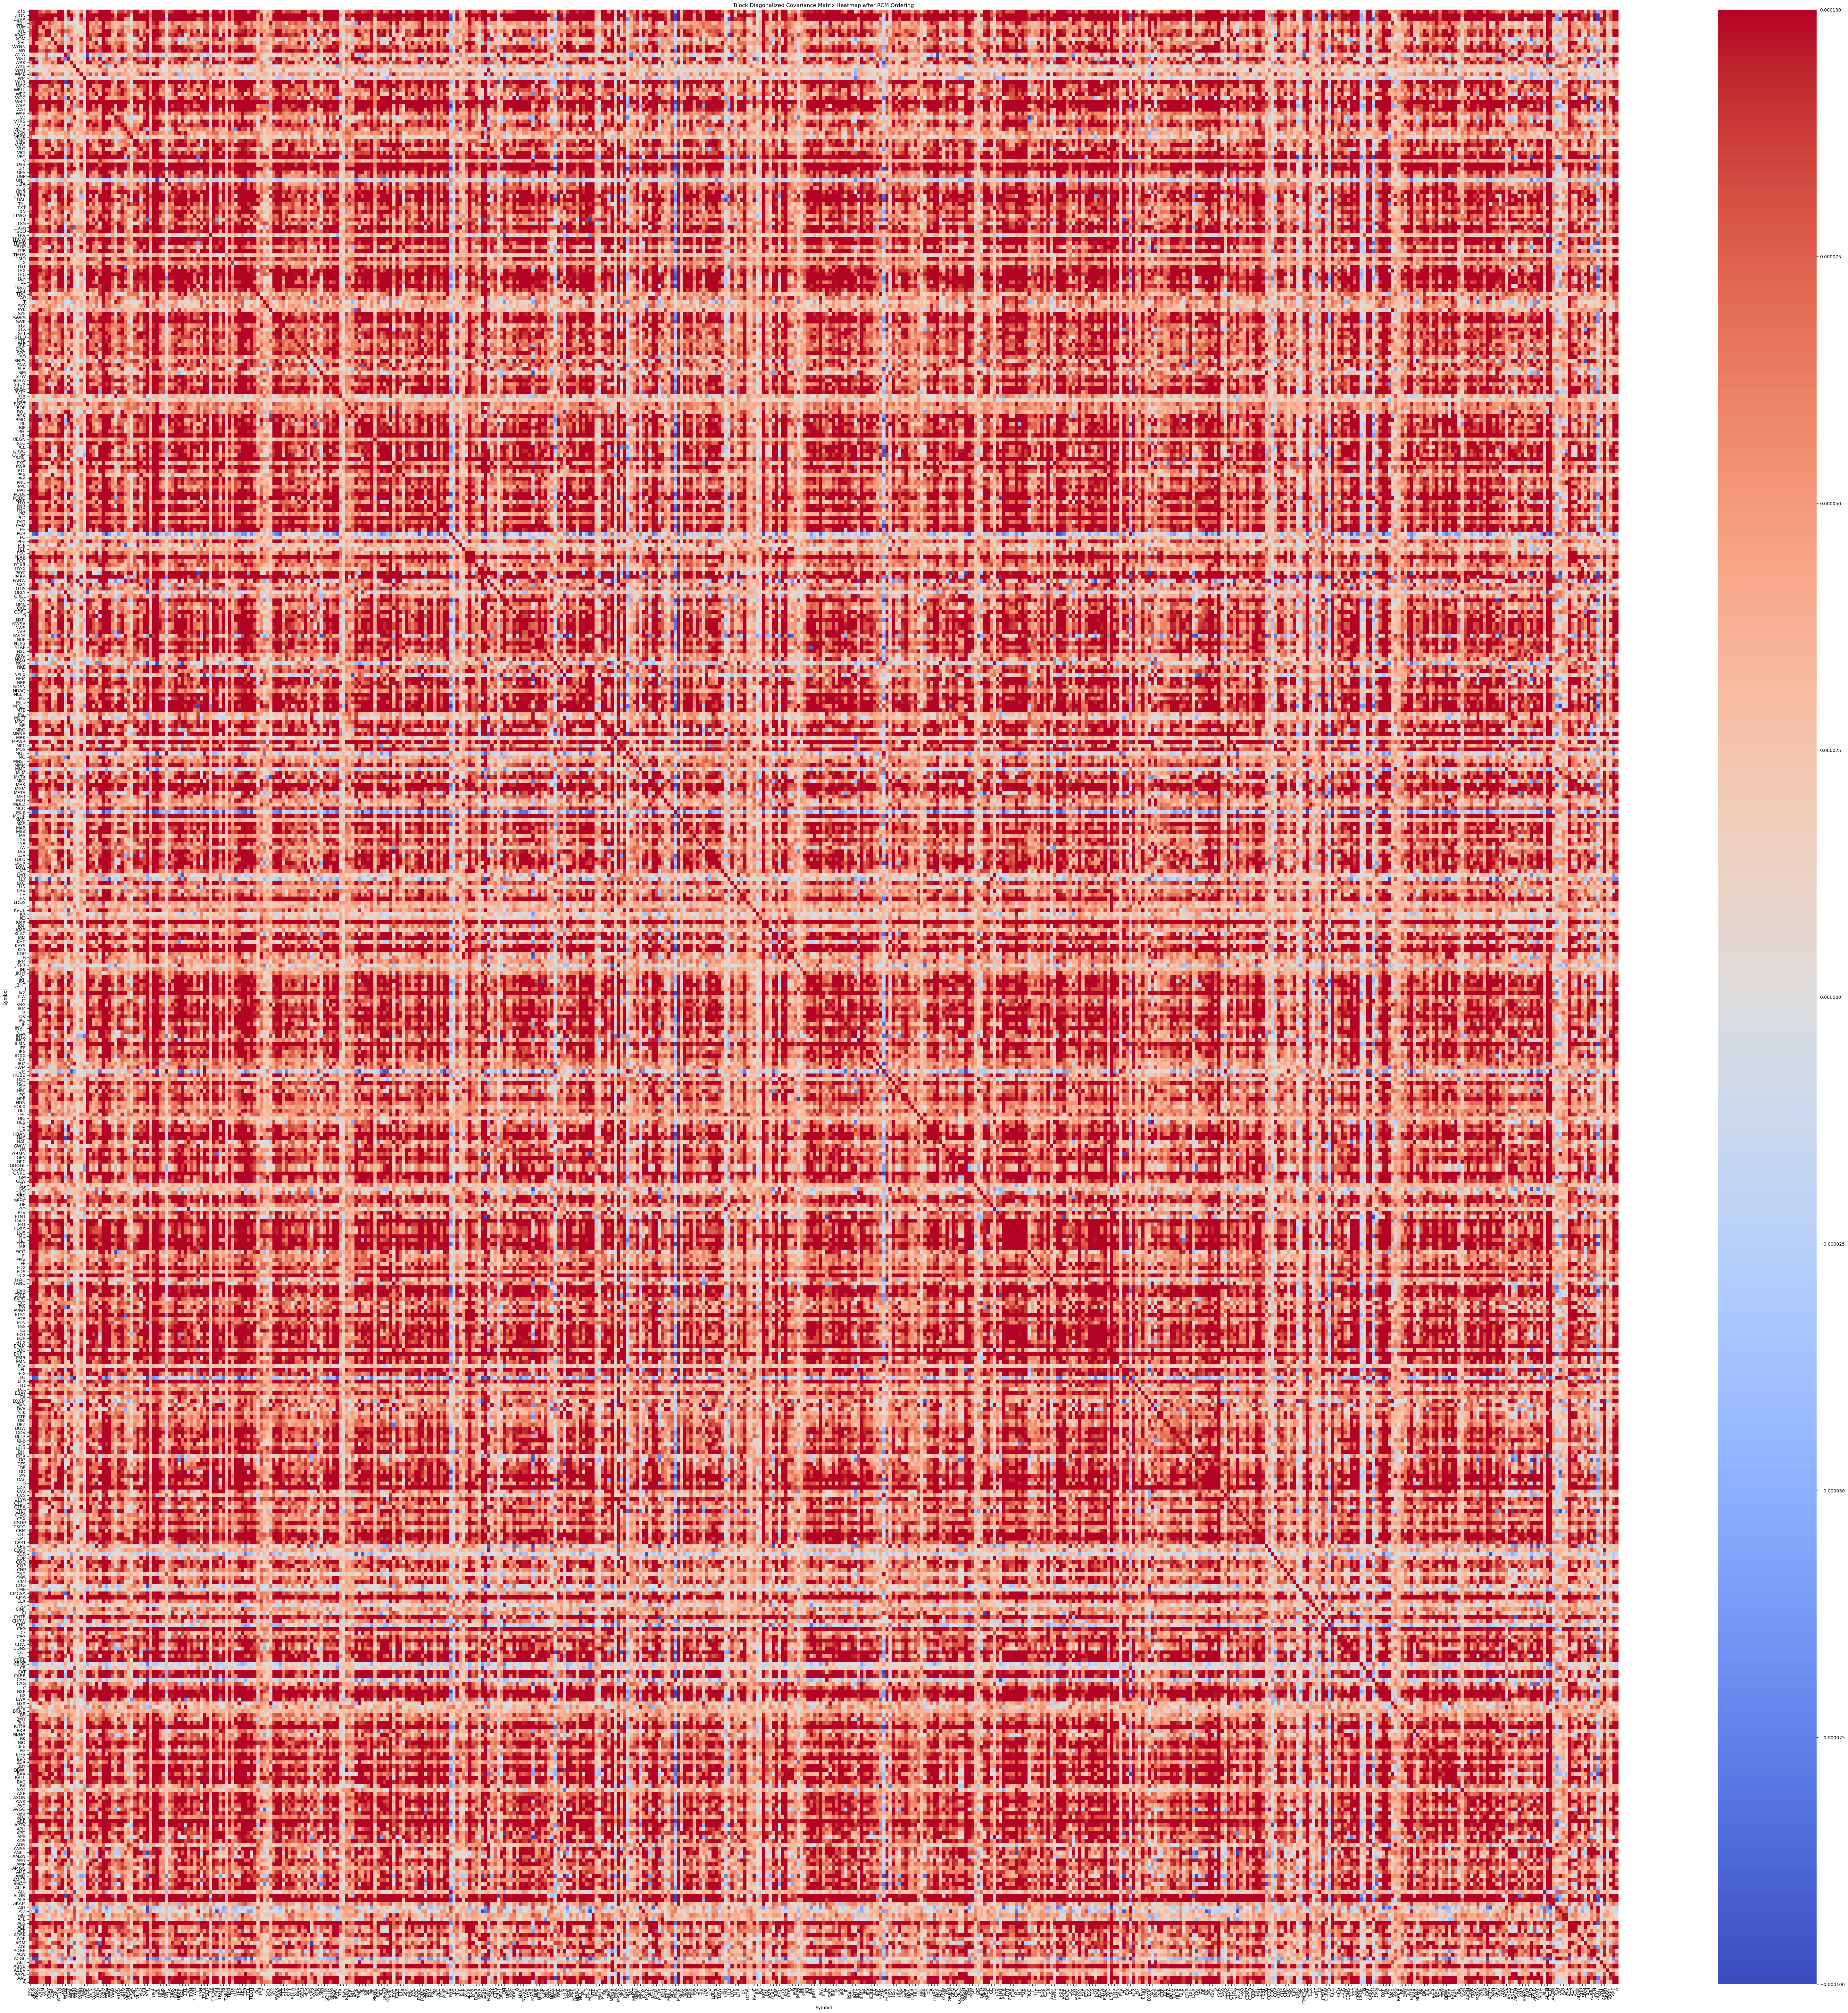

In [13]:
from scipy.sparse.csgraph import reverse_cuthill_mckee, minimum_spanning_tree 
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

# Apply the Sparse Reverse Cuthill-McKee algorithm to get the optimal ordering
sparse_matrix = 1000000000*csr_matrix(cov_matrix)
rcm_order = reverse_cuthill_mckee(sparse_matrix, symmetric_mode=True)
#rcm_order = np.unique(minimum_spanning_tree(sparse_matrix).nonzero()[1])

ordered_cov_matrix = cov_matrix.iloc[rcm_order, rcm_order]

plt.figure(figsize=(80, 80))
svm = sns.heatmap(ordered_cov_matrix, annot=False, cmap='coolwarm', xticklabels=ordered_cov_matrix.index, yticklabels=ordered_cov_matrix.index, vmin=-0.0001, vmax=0.0001)
plt.title('Block Diagonalized Covariance Matrix Heatmap after RCM Ordering')
plt.show()
figure = svm.get_figure() 
figure.savefig('sp500_bd_large.png', dpi=400)

In [12]:
from scipy.sparse.csgraph import laplacian
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans

# Step 1: Compute the Laplacian of the sparse matrix
laplacian_matrix, _ = laplacian(sparse_matrix, normed=True, return_diag=True)

# Step 2: Perform spectral clustering
# We compute the smallest non-zero eigenvalues and their corresponding eigenvectors
num_clusters = 10  # This is a parameter you might need to adjust based on the data
eigenvalues, eigenvectors = eigsh(laplacian_matrix, k=num_clusters + 1, which='SM', sigma=1.0)

# Step 3: Use the eigenvectors for clustering (ignoring the first eigenvector, which corresponds to the smallest eigenvalue)
X = eigenvectors[:, 1:num_clusters + 1]

# Perform KMeans clustering on the reduced dimensional space
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
labels = kmeans.labels_

# Step 4: Order the nodes based on the cluster labels
order = np.argsort(labels)

# Step 5: Reorder the covariance matrix based on the clustering order
cov_matrix_reordered_spectral = cov_matrix.iloc[order, order]

# Step 6: Plot the reordered covariance matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix_reordered_spectral, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap - Ordered by Spectral Clustering')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.xticks(ticks=np.arange(len(order)), labels=cov_matrix.columns[order], rotation=90)
plt.yticks(ticks=np.arange(len(order)), labels=cov_matrix.columns[order], rotation=0)
plt.show()

KeyboardInterrupt: 

In [38]:
symbol_to_sector = data["companies"].set_index('Symbol')['Sector'].to_dict()
sects = [symbol_to_sector[ii] if ii in symbol_to_sector.keys() else 'UNK' for ii in cov_matrix.index]
unique_sects = sorted(set(sects))
num_colors = len(unique_sects)
colors = sns.color_palette("hsv", num_colors)
color_map = {sect: colors[i] for i, sect in enumerate(unique_sects)}
rgba_colors = [color_map[sect] for sect in sects]

symbol_to_industry = data["companies"].set_index('Symbol')['Industry'].to_dict()
inds = [symbol_to_industry[ii] if ii in symbol_to_sector.keys() else 'UNK' for ii in cov_matrix.index]
unique_sects = sorted(set(inds))
num_colors = len(unique_sects)
colors = sns.color_palette("hsv", num_colors)
color_map = {sect: colors[i] for i, sect in enumerate(unique_sects)}
rgba_colors_ind = [color_map[sect] for sect in inds]

scm = sns.clustermap(cov_matrix, xticklabels=cov_matrix.index, yticklabels=cov_matrix.index, 
                     cmap='coolwarm', vmin=-0.0001, vmax=0.0001, 
                     row_colors=rgba_colors, col_colors=rgba_colors_ind, 
                     figsize=(80,80))
scm.figure.savefig('sp500_bd_large.png', dpi=400)

C:\Users\Clint\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Clint\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
